In this section, we will use what we learned about fitting models and apply it to a very useful machine-learning algorithm.

First let's start with imports.


In [16]:
import numpy as np
import scipy
import sklearn
from sklearn import datasets
import pandas as pd
import os

#### Load in some digit image data

One of the canonical datasets in sklearn is a series of images of handwritten digits. We've imported the datasets above, but now lets load it.

In [17]:
digits = datasets.load_digits()

# First, take a look at the raw python object:
print('digits\n', digits)

digits
 {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel

Not super helpful unless you're very good at reading python dictionary notation. Fortunately, one of the entries in this dataset is a description. Let's read that.

In [18]:
print('DESCR\n', digits['DESCR'])

DESCR
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in e

#### Extract one of the digits to inspect

Now that we're oriented, also look at one particular image of a digit, just so you know what it actually looks like. Below, we print just the first (index = 0) numeral of the 5620 they provide.

In [19]:
print('digits.images[0]\n', digits.images[0])

digits.images[0]
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


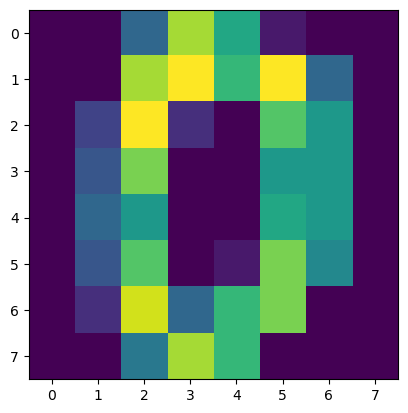

In [20]:
# If you squint, maybe you can tel what image it is, but let's plot it to be sure.
import matplotlib
from matplotlib import pyplot as plt
plt.imshow(digits.images[0])
plt.show()

Notice also in the dataset that there is a 'targets' attribute in the dataset. This is the correct numeral that we are trying to make the model predict.

In [21]:
print('target', digits.target)

target [0 1 2 ... 8 9 8]


Our task now is to train a model that inputs the digit images and predicts the digit numeral. For this, we're going to use SVM, as discussed in lecture.

#### Import SVM and create a new (unfitted) model with it.

For now, the parameters are going to be manually set (gamme) but we'll address how to choose them later. Here, I want to illustrate the basic approach used in sklearn to Load, train, fit and predict the model

In [ ]:
from sklearn import svm

# Create the model object
classifier = svm.SVC(gamma=0.001)

At this point, classifier is not yet "trained", ie. not yet fit to the model. All ML algorithms in SKLEARN have a .fit() method, which we will use here, passing it the images and the targets.

Before we train it, we want to split the data into testing and training splits.

Class question: Remind me WHY are we splitting it here? What is the bad thing that would happen if we just trained it on all of them?

Before we can even split the data, however, we need to reshape it to be in the way the regression model expects.

In particular, the SVM model needs a 1-dimensional, 64 element array. BUT, the input digits we saw were 2-dimensional, 8 by 8 arrays.

This actually leads to a somewhat mind-blown example of how computers "think" differently than we do. We clearly think about a numeral in 2 dimensional space, but here we see that the computer doesn't are about the spatial relationship ship at all. It sees each individual pixel as it's own "Feature" to use the classification parlance. You could even reshuffle the order of those 64 digits and as long as you kept it consistent across the data, it would result in identical predictions.

Later on, we will talk about machine learning techniques that leverage rather than ignore this 2 dimensional, spatial nature of the data.

For now, let's just look at the data again. Rather than print it out, I really just want the shape
so that i don't get inundated with text.

In [22]:
print('digits.images shape', digits.images.shape)

digits.images shape (1797, 8, 8)


In [23]:
n_samples = len(digits.images)
n_features = digits.images[0].size

print('n_samples', n_samples)
print('n_features', n_features)

data = digits.images.reshape((n_samples, n_features))

# Now check the shame again to see that it's right.
print('data shape', data.shape)

n_samples 1797
n_features 64
data shape (1797, 64)


In [24]:
# Now that we've arranged our data in this shape, we can split it into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

print('X_train', X_train)
print('y_train', y_train)

X_train [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  2. ... 14.  0.  0.]
 [ 0.  1. 12. ...  0.  0.  0.]
 [ 0.  0.  0. ...  3.  0.  0.]]
y_train [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8
 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4

#### Fit the  model

 Finally, now that we've split it, we can call the classifier's fit method which takes the TRAINING data as input.

In [25]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

Now, our classifier object has it's internal parameters fit so that when we give it new input, it predicts what it thinks the correct classification is.

In [26]:
predicted = classifier.predict(X_test)

# Looking at the predicted won't be very intuitive, but you could glance.
print('predicted', predicted)

predicted [8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 2 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 9 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 3 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 3 

#### Plot some results

Let's plot a few of them in nicer format. Don't worry about learning the plotting code but it's a useful example to show the power.

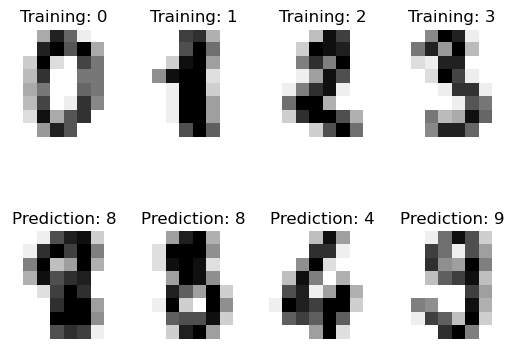

In [27]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

In [28]:
from sklearn import metrics

print("Classification report:\n", metrics.classification_report(y_test, predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



#### Confusion matrix

A more convenient way of looking at the results is t the confusion matrix. This is a built in metric for sklearn. It plots the predicted labels vs. the true labels.

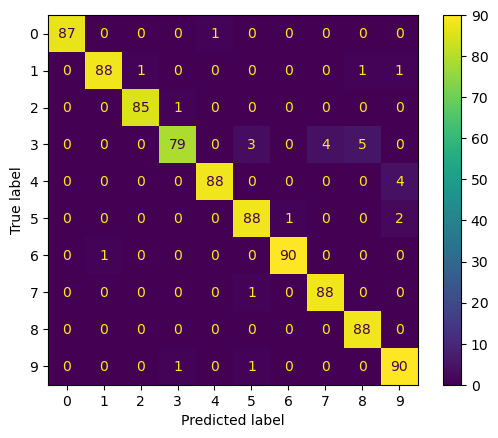

In [29]:
# Finally, plot the Confusion Matrix to see which digits were most often confused with each other.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predicted)

**QUESTION:** Which digit was hardest to categorize and what was it most frequently confused as?
